In [1]:
import pandas as pds 
import subprocess
import json
import matplotlib.pyplot as plt
import numpy as np

def get_experiments_from_path(start_path):
    experiment_dot_json_paths = subprocess.getoutput('find {} | grep experiment.json'.format(start_path))

    experiment_dot_json_paths = experiment_dot_json_paths.split('\n')
    experiments = []
    for p in experiment_dot_json_paths:
        with open(p) as f:
            experiments.append(json.load(f))
    
    return experiments

# CORES Dataset, CNN, One source Domain

In [2]:
cores_cnn_3_raw = get_experiments_from_path("../cores_cnn_3")

print("parameters", cores_cnn_3_raw[0]["parameters"].keys())
print("results", cores_cnn_3_raw[0]["results"].keys())

parameters dict_keys(['experiment_name', 'lr', 'device', 'seed', 'desired_classes', 'batch_size', 'n_epoch', 'patience', 'criteria_for_best', 'normalize_source', 'normalize_target', 'x_net', 'NUM_LOGS_PER_EPOCH', 'RESULTS_DIR', 'EXPERIMENT_JSON_PATH', 'LOSS_CURVE_PATH', 'BEST_MODEL_PATH', 'num_examples_per_class_per_domain', 'source_domains', 'target_domains'])
results dict_keys(['source_test_label_accuracy', 'source_test_label_loss', 'target_test_label_accuracy', 'target_test_label_loss', 'source_val_label_accuracy', 'source_val_label_loss', 'target_val_label_accuracy', 'target_val_label_loss', 'total_epochs_trained', 'total_experiment_time_secs', 'confusion', 'per_domain_accuracy'])


In [3]:
cores_cnn_3_processed = []

for e in cores_cnn_3_raw:
    p = {}
    p["experiment_name"]  = e["experiment_name"]
    p["source_domains"]  = str(e["parameters"]["source_domains"])
    # p["per_domain_accuracy"]  = e["results"]["per_domain_accuracy"]
    for domain,accuracy in e["results"]["per_domain_accuracy"].items():
        p[domain.format(domain)] = accuracy["accuracy"]
    
    
    cores_cnn_3_processed.append(p)

df = pds.DataFrame(cores_cnn_3_processed)

In [4]:
df = df.groupby("source_domains").mean()
df

,2,5,1,3,4
source_domains,,,,,
[1],0.483218,0.439080,0.991494,0.479080,0.439080
[2],0.979080,0.680460,0.465287,0.806207,0.758161
[3],0.825747,0.719540,0.507816,0.978161,0.770805
[4],0.758161,0.700460,0.411724,0.727586,0.970115
[5],0.681609,0.973103,0.416092,0.687356,0.695172


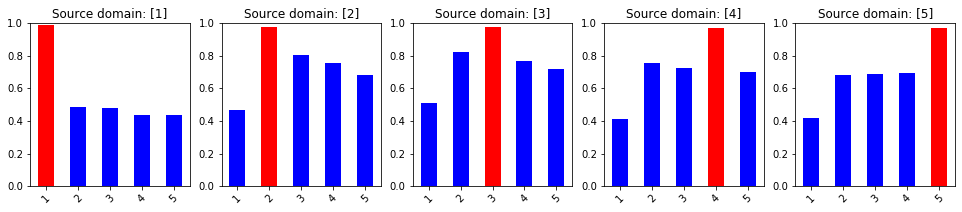

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 3]

domain_colors = {True: 'r', False: 'b'}
for i, (name, row) in enumerate(df.iterrows()):
    row = row.sort_index()
    ax = plt.subplot(1,6, i+1)
    ax.set_title("Source domain: {}".format(name))
    ax.set_ylim([0.0, 1.0])
    
    source_indices = eval(name)
    row.plot(kind="bar", ax=ax, color=[domain_colors[int(domain) in source_indices] for domain in row.index])
    plt.xticks(rotation=45)

# CORES, PTN, One source domain

In [6]:
raw = get_experiments_from_path("../cores_ptn_1")
processed = []

for e in raw:
    p = {}
    p["experiment_name"]  = e["experiment_name"]
    p["source_domains"]  = str(e["parameters"]["source_domains"])
    # p["per_domain_accuracy"]  = e["results"]["per_domain_accuracy"]
    for domain,accuracy in e["results"]["per_domain_accuracy"].items():
        p[domain.format(domain)] = accuracy["accuracy"]
    
    
    processed.append(p)

df = pds.DataFrame(processed)
df

,experiment_name,source_domains,1,3,5,4,2
0,cores_ptn_1,[1],0.995690,0.966954,0.972701,0.931034,0.939655
1,cores_ptn_1,[3],0.965517,0.991379,0.982759,0.958333,0.974138
2,cores_ptn_1,[5],0.951149,0.951149,0.995690,0.926724,0.955460
3,cores_ptn_1,[5],0.977011,0.978448,1.000000,0.948276,0.972701
4,cores_ptn_1,[2],0.946839,0.946839,0.919540,0.912356,0.982759
5,cores_ptn_1,[3],0.965517,0.989943,0.958333,0.920977,0.958333
6,cores_ptn_1,[2],0.952586,0.954023,0.961207,0.931034,0.985632
7,cores_ptn_1,[3],0.961207,0.969828,0.955460,0.939655,0.966954
8,cores_ptn_1,[4],0.984195,0.972701,0.991379,0.995690,0.988506
9,cores_ptn_1,[1],0.997126,0.936782,0.931034,0.875000,0.926724


In [7]:
df = df.groupby("source_domains").mean()
df

,1,3,5,4,2
source_domains,,,,,
[1],0.994540,0.941954,0.948276,0.913218,0.931897
[2],0.949713,0.967816,0.957759,0.927011,0.989368
[3],0.952011,0.982759,0.959483,0.930460,0.967816
[4],0.981609,0.971839,0.982184,0.989943,0.981609
[5],0.958621,0.958333,0.995402,0.937069,0.964368


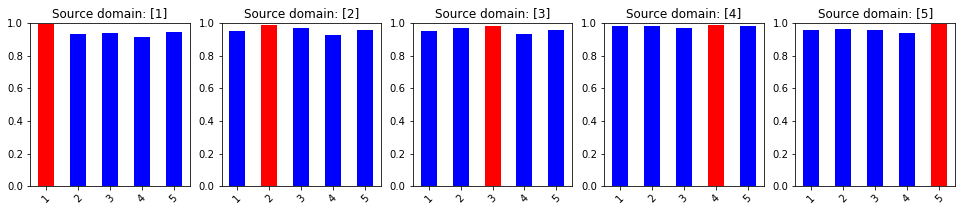

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 3]

domain_colors = {True: 'r', False: 'b'}
for i, (name, row) in enumerate(df.iterrows()):
    row = row.sort_index()
    ax = plt.subplot(1,6, i+1)
    ax.set_title("Source domain: {}".format(name))
    ax.set_ylim([0.0, 1.0])
    
    source_indices = eval(name)
    row.plot(kind="bar", ax=ax, color=[domain_colors[int(domain) in source_indices] for domain in row.index])
    plt.xticks(rotation=45)

# ORACLE Dataset, CNN, One source Domain

In [14]:
raw = get_experiments_from_path("../cores_cnn_2")
processed = []

for e in raw:
    p = {}
    p["experiment_name"]  = e["experiment_name"]
    p["source_domains"]  = str(e["parameters"]["source_domains"])
    p["num_examples_per_class_per_domain"] = e["parameters"]["num_examples_per_class_per_domain"]
    
    for domain,accuracy in e["results"]["per_domain_accuracy"].items():
        p[domain.format(domain)] = accuracy["accuracy"]
    
    
    processed.append(p)

df = pds.DataFrame(processed)
df_orig = df
df

KeyError: 'num_examples_per_class_per_domain'

In [15]:
# Extremely low accuracy on target domain 32
df[(df["num_examples_per_class_per_domain"] == 10000) & (df["source_domains"] == "[26]")]

,experiment_name,source_domains,num_examples_per_class_per_domain,1,5,4,3,2


In [16]:
df_orig = df
df = df.groupby(["num_examples_per_class_per_domain", "source_domains"]).mean()
cols = df.columns.tolist()
cols.sort()
df.sort_index()
df = df[cols]
df

1         2  \
num_examples_per_class_per_domain source_domains                       
100                               [1]             0.996296  0.648148   
                                  [2]             0.684444  0.991111   
                                  [3]             0.690370  0.978519   
                                  [4]             0.668889  0.942963   
                                  [5]             0.624444  0.913333   

                                                         3         4         5  
num_examples_per_class_per_domain source_domains                                
100                               [1]             0.702963  0.682963  0.651111  
                                  [2]             0.968889  0.965185  0.951111  
                                  [3]             0.978519  0.985185  0.930370  
                                  [4]             0.953333  0.995556  0.935556  
                                  [5]             0.892593  0.929630  0.998519

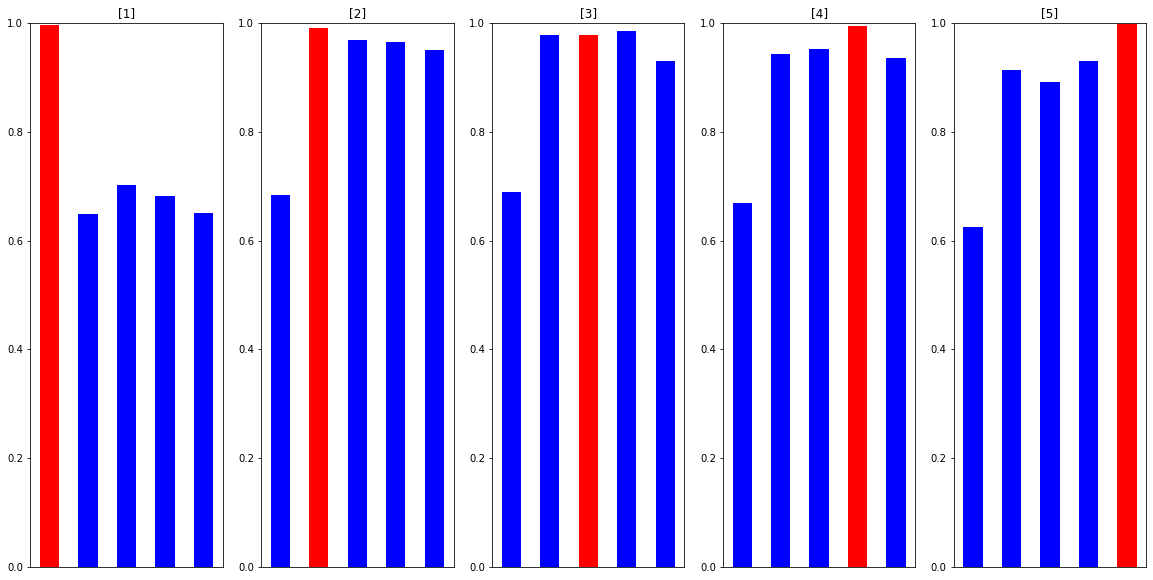

In [17]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

n_rows = len(df.groupby("num_examples_per_class_per_domain").size())
n_cols = len(df.groupby("source_domains").size())


domain_colors = {True: 'r', False: 'b'}
for i, ((num_examples_per_class_per_domain, name), row) in enumerate(df.iterrows()):
    # print(name)
    # print(num_examples_per_class_per_domain)
    # print(row)
    # adsf
    row = row.sort_index()
    ax = plt.subplot(n_rows,n_cols, i+1)
    ax.set_title("{}".format(name))
    ax.set_ylim([0.0, 1.0])
    
    source_indices = eval(name)
    row.plot(kind="bar", ax=ax, color=[domain_colors[int(domain) in source_indices] for domain in row.index])
    plt.xticks(rotation=45)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)

Text(0, 0.5, 'Accuracy')

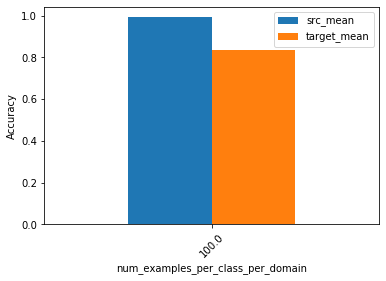

In [18]:
%matplotlib inline
df = df_orig
group = df.groupby(["num_examples_per_class_per_domain", "source_domains"])

new_df = pds.DataFrame()

for (n_ex,src), _df in group:
    src_doms = [str(s) for s in eval(src)]
    target_doms = list(set(_df.drop(columns=["experiment_name", "source_domains", "num_examples_per_class_per_domain"]).columns.tolist()) - set(src_doms))
        
    target_mean = _df[target_doms].mean(axis=1).mean()
    src_mean = _df[src_doms].mean(axis=1).mean()
    
    new_df = new_df.append(
        {
            "num_examples_per_class_per_domain": n_ex,
            "source_domains": src,
            "src_mean":src_mean,
            "target_mean":target_mean,
        }, ignore_index=True
    )

new_df = new_df.groupby("num_examples_per_class_per_domain")[["src_mean", "target_mean"]].mean()
new_df.plot(kind="bar")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")


# ORACLE Dataset, PTN, One source Domain

In [13]:
raw = get_experiments_from_path("../oracle_ptn_1")
processed = []

for e in raw:
    p = {}
    p["experiment_name"]  = e["experiment_name"]
    p["source_domains"]  = str(e["parameters"]["source_domains"])
    # p["per_domain_accuracy"]  = e["results"]["per_domain_accuracy"]
    for domain,accuracy in e["results"]["per_domain_accuracy"].items():
        p[domain.format(domain)] = accuracy["accuracy"]
    
    
    processed.append(p)

df = pds.DataFrame(processed)
df

,experiment_name,source_domains,2,20,62,50,26,38,56,14,8,44,32
0,oracle_ptn_1,[2],0.543490,0.184896,0.352865,0.321094,0.219792,0.407031,0.373177,0.316667,0.338021,0.320312,0.346354
1,oracle_ptn_1,[62],0.285417,0.230469,0.857552,0.509115,0.275000,0.597656,0.685677,0.429688,0.385417,0.422135,0.541146
2,oracle_ptn_1,[2],0.539062,0.169271,0.372656,0.281250,0.229687,0.367708,0.358073,0.335677,0.360677,0.297135,0.324479
3,oracle_ptn_1,[14],0.266927,0.332813,0.682813,0.551823,0.432812,0.637760,0.691927,0.754167,0.464583,0.556250,0.630990
4,oracle_ptn_1,[2],0.539583,0.174740,0.346875,0.309375,0.221875,0.379427,0.354948,0.318490,0.356510,0.312500,0.345833
